In [2]:

# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

import numpy as np
import imageio
import random
import scipy.ndimage as ndimage 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.bezier as mbezier
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
IMAGE_DIR = '../images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax
params = ["x", "y", "r", "theta", "dr", "dgamma", "width", "colour"]

def crop (image, mask):
    h, w = np.shape(image)
    return image[max(mask[0],0):min(mask[1],h), max(mask[2],0):min(mask[3],w)]

    
def prep_image (imdir, imname, mask):
    print("Image name (shape) (intensity max, min, mean, std)\n")
    image = np.flipud(crop(imageio.imread(imdir+'/'+imname+".png"), mask))
    print("{} {} ({}, {}, {}, {})".format(imname, np.shape(image), np.max(image), np.min(image), round(np.mean(image),1), round(np.std(image),1)))
    # plt.imshow(image, vmin=0, vmax=255, cmap='gray', origin='lower') # use vmin and vmax to stop imshow from scaling
    plt.show()
    return image

original_image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


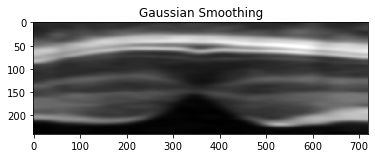

In [9]:
image = ndimage.gaussian_filter(original_image, sigma=(3, 16), order=0)
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.title("Gaussian Smoothing")
plt.show() 

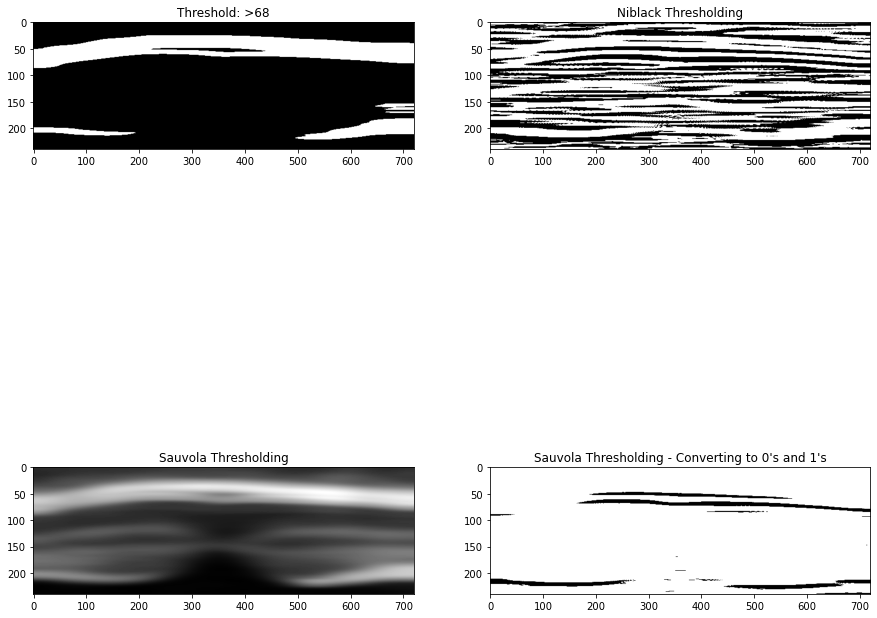

In [96]:

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
# gray_image = rgb2gray(image)
gray_image = image

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_image)

# Computing binarized values using the obtained
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_image)

# Computing binarized values using the obtained
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_image)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")


/tmp/ipykernel_1728625/105807528.py:12: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  chanvese_gray_imgage = chan_vese(gray_imgage,


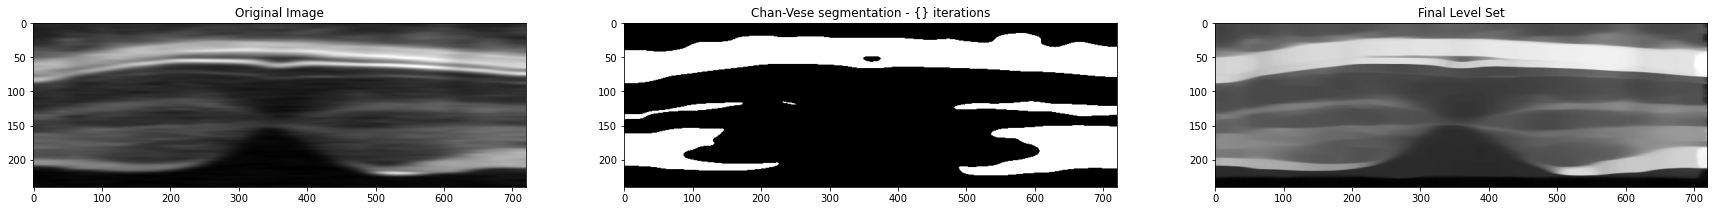

In [7]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
fig, axes = plt.subplots(1, 3, figsize=(30, 20))

# Sample Image of scikit-image package
# gray_imgage = rgb2gray(imgage)
gray_imgage = image 

# Computing the Chan VESE segmentation technique
chanvese_gray_imgage = chan_vese(gray_imgage,
									max_iter=100,
									extended_output=True)

ax = axes.flatten()

# Plotting the original image
ax[0].imshow(gray_imgage, cmap="gray")
ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_imgage[0], cmap="gray")
title = "Chan-Vese segmentation - {} iterations"
format(len(chanvese_gray_imgage[2]))

ax[1].set_title(title)

# Plotting the final level set
ax[2].imshow(chanvese_gray_imgage[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()


In [106]:
np.round(chanvese_gray_imgage[1], decimals=3)

array([[-0.191, -0.192, -0.192, ..., -0.309, -0.309, -0.307],
       [-0.202, -0.203, -0.205, ..., -0.345, -0.35 , -0.353],
       [-0.204, -0.205, -0.207, ..., -0.349, -0.352, -0.353],
       ...,
       [-0.513, -0.518, -0.518, ..., -0.509, -0.509, -0.507],
       [-0.513, -0.518, -0.518, ..., -0.509, -0.509, -0.507],
       [-0.513, -0.518, -0.518, ..., -0.509, -0.509, -0.507]])

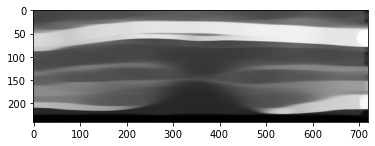

In [108]:
plt.imshow(chanvese_gray_imgage[1], cmap="gray")
plt.show()

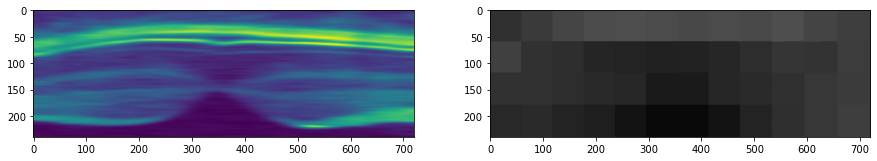

In [94]:
# Importing required libraries
from skimage.segmentation import slic
from skimage.color import label2rgb

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))


# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
image_segments = slic(image,
						n_segments=50,
						compactness=10)
plt.subplot(1,2,1)

# Plotting the original image
plt.imshow(image)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(image_segments,
					image,
					kind = 'avg'))


Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


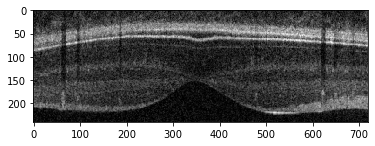

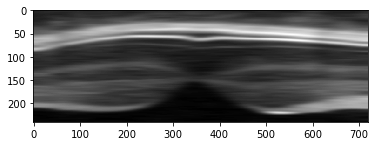

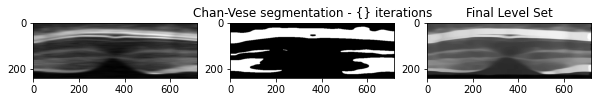

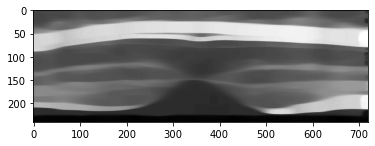

In [2]:
import numpy as np
import imageio
import scipy.ndimage as ndimage 
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese


IMAGE_DIR = '../images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax
params = ["x", "y", "r", "theta", "dr", "dgamma", "width", "colour"]

def crop (image, mask):
    h, w = np.shape(image)
    return image[max(mask[0],0):min(mask[1],h), max(mask[2],0):min(mask[3],w)]

    
def prep_image (imdir, imname, mask):
    print("Image name (shape) (intensity max, min, mean, std)\n")
    image = np.flipud(crop(imageio.imread(imdir+'/'+imname+".png"), mask))
    print("{} {} ({}, {}, {}, {})".format(imname, np.shape(image), np.max(image), np.min(image), round(np.mean(image),1), round(np.std(image),1)))
    # plt.imshow(image, vmin=0, vmax=255, cmap='gray', origin='lower') # use vmin and vmax to stop imshow from scaling
    plt.show()
    return image

original_image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

plt.imshow(original_image, interpolation='nearest', cmap='gray')
plt.show() 
# plt.savefig("../images/original_image.png")

image = ndimage.gaussian_filter(original_image, sigma=(1, 16), order=0)
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.show() 
# plt.savefig("../images/smoothed.png")


fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Sample Image of scikit-image package
# gray_imgage = rgb2gray(imgage)
gray_imgage = image 

# Computing the Chan VESE segmentation technique
chanvese_gray_imgage = chan_vese(gray_imgage,
									max_num_iter=100,
									extended_output=True)

ax = axes.flatten()

# Plotting the original image
ax[0].imshow(gray_imgage, cmap="gray")
# ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_imgage[0], cmap="gray")
title = "Chan-Vese segmentation - {} iterations"
format(len(chanvese_gray_imgage[2]))

ax[1].set_title(title)

# Plotting the final level set
ax[2].imshow(chanvese_gray_imgage[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()
# plt.savefig("../images/comparison.png")



chansvese_rounded = np.round(chanvese_gray_imgage[1], decimals=2)
plt.imshow(chansvese_rounded, cmap="gray")
plt.show()
# plt.savefig("../images/rounded_level_set.png")

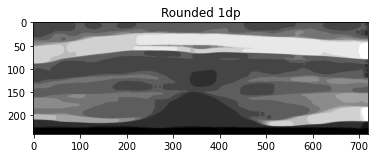

In [8]:
chansvese_rounded = np.round(chanvese_gray_imgage[1], decimals=1)
plt.imshow(chansvese_rounded, cmap="gray")
plt.title("Rounded 1dp")
plt.show()

In [10]:
diff = chansvese_rounded - chanvese_gray_imgage[0]

In [14]:
sum(diff[0])+sum(diff[1])

-212.70000000000124

In [22]:
sum(sum(diff))

-59416.500000000124